# лабораторная работа 3.4.2

In [5]:
import sys
print(sys.executable)

c:\Python312\python.exe


In [6]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from scipy.optimize import curve_fit
from IPython.display import display, Math

In [7]:
def mnk(x : np.array, y : np.array):
    mean_x   = np.mean(x)
    mean_y   = np.mean(y)
    mean_xy  = np.mean(x * y)
    mean_xsq = np.mean(x * x)
    mean_ysq = np.mean(y * y)

    print('x:   ', mean_x)
    print('y:   ', mean_y)
    print('xy:  ', mean_xy)
    print('x^2: ', mean_xsq)
    print('y^2: ', mean_ysq)


    k = (mean_xy - mean_x * mean_y) / (mean_xsq - mean_x ** 2)
    b = mean_y - k*mean_x

    print('k =', k)
    print('b =', b)

    delta_k = 1 / np.sqrt(len(x)) * np.sqrt((mean_ysq - mean_y**2)/(mean_xsq - mean_x**2) - k*k)
    print('delta_k = ', delta_k)

    delta_b = delta_k * np.sqrt(mean_xsq - mean_x ** 2)
    print('delta_b = ', delta_b)

    print('\n')

    n = len(x)

    return [k, b]

def plot_linear(x : np.array, y : np.array, col_index : int, label):
    color = plt.cm.tab10(col_index)

    coeffs = mnk(x, y)
    plt.plot(x, y, 'o', color = color)

    x = np.linspace(min(x), max(x), 3)
    plt.plot(x, coeffs[0] * x + coeffs[1], color = color, label=label)

In [39]:
def plot(x_ax, x_err, y_ax, y_err, label_x, label_y, graph_name):
    print("x_ax = ", x_ax)
    print("y_ax = ", y_ax)

    # plot_linear(x, I, 1, '')


    coeffs1, cov1 = np.polyfit(x_ax[5:], y_ax[5:], 1, cov = True)  # линейная аппроксимация
    a1, b1 = coeffs1  # I = a*x + b

    x_fit1 = np.linspace(min(x_ax), max(x_ax), 100)
    y_fit1 = a1*x_fit1 + b1

    x_ax2 = x_ax[[0, 2, 3]]
    y_ax2 = y_ax[[0, 2, 3]]
    coeffs2, cov2 = np.polyfit(x_ax2-x_ax2.mean(), y_ax2, 1, cov = True)  # линейная аппроксимация
    a2, b2 = coeffs2  # I = a*x + b
    b2 -= a2 * x_ax2.mean()

    x_fit2 = np.linspace(min(x_ax), max(x_ax), 100)
    y_fit2 = a2*(x_fit2) + b2

    sigma_a1 = np.sqrt(cov1[0,0])  # стандартная ошибка наклона
    sigma_a2 = np.sqrt(cov2[0,0])  # стандартная ошибка наклона
    sigma_b1 = np.sqrt(cov1[1,1])  # стандартная ошибка свободного члена
    sigma_b2 = np.sqrt(cov2[1,1])  # стандартная ошибка свободного члена

    print(f"a1 = {a1:.3f} ± {sigma_a1:.3f}")
    print(f"b1 = {b1:.3f} ± {sigma_b1:.3f}")
    print("Covariance matrix:\n", cov1)

    print(f"a2 = {a2:.3f} ± {sigma_a2:.3f}")
    print(f"b2 = {b2:.3f} ± {sigma_b2:.3f}")
    print("Covariance matrix:\n", cov2)

    plt.errorbar(
        x_ax, y_ax,
        yerr=y_err,
        xerr=x_err,
        fmt= 'k.',
        # capsize=4,
        markersize=1,
        label='Эксперимент'
    )

    # plt.plot(x, I, 'o', markersize = 3, label='Данные')
    plt.plot(x_fit1, y_fit1, '-', label='Линейная аппроксимация')
    plt.plot(x_fit2, y_fit2, '-', label='Линейная аппроксимация')

    plt.suptitle(graph_name)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    plt.grid(True, which='both', alpha=0.5)
    plt.minorticks_on()
    # plt.legend()

    # plt.legend()
    plt.show()

In [9]:
# Температура, °C
t = np.array([
    14.34, 16.03, 18.02, 20.03, 22.02, 24.01,
    26.02, 28.01, 30.00, 32.00, 34.00, 36.00,
    38.00, 40.00
])

# ΔU, мВ
du = np.array([
    -0.012, -0.013, -0.013, -0.013, -0.014, -0.014,
    -0.014, -0.011, -0.014, -0.016, -0.015, -0.014,
    -0.016, -0.015
])

tau_0 = 8.25
dtau_0 = 0.01
# tau, мс
tau = [
    10.035, 9.045, 9.758, 9.427, 9.048, 8.744,
    8.607, 8.53, 8.485, 8.453, 8.427, 8.407,
    8.394, 8.381
]


x_ax =  [14.34 16.03 18.02 20.03 22.02 24.01 26.02 28.01 30.   32.   34.   36.
 38.   40.  ]
y_ax =  [0.03063845 0.07272979 0.03682419 0.04806345 0.0724438  0.11911801
 0.16616957 0.21283841 0.25427661 0.29492357 0.33877301 0.38238739
 0.41723411 0.45899752]
a1 = 0.021 ± 0.000
b1 = -0.383 ± 0.008
Covariance matrix:
 [[ 6.29324466e-08 -2.01411799e-06]
 [-2.01411799e-06  6.61355724e-05]]
a2 = 0.003 ± 0.001
b2 = -0.012 ± 0.002
Covariance matrix:
 [[1.00580227e-06 1.18391147e-21]
 [1.18391147e-21 5.58316369e-06]]


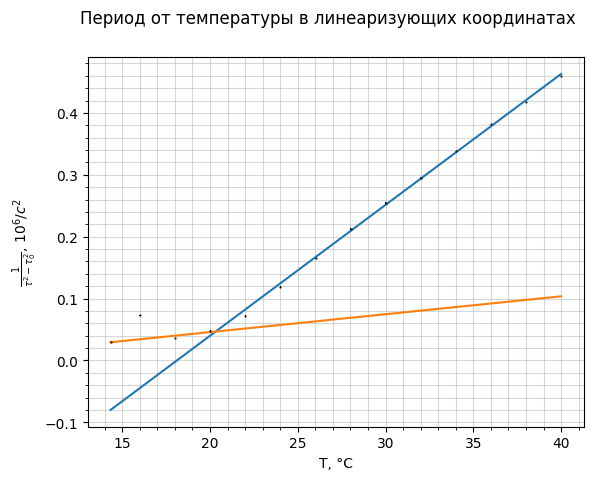

In [40]:
y_ax = np.array([1 / (tau[i] ** 2 - tau_0 ** 2) for i in range(len(tau))])
x_ax = t

y_err = [0.0001] * len(y_ax)
x_err = [0.01] * len(x_ax)

plot(x_ax, x_err, y_ax, y_err,
     'T, °C', r'$\frac{1}{\tau^2 - \tau_0^2}$, $10^6 / c^2$',
     'Период от температуры в линеаризующих координатах')


In [11]:
a  =  0.021
da =  0
b  = -0.383
db =  0.008

theta_p = -b / a
dtheta_p = theta_p * abs(db/ b)

print("\\theta_p = ", theta_p, "\\pm", dtheta_p)



\theta_p =  18.238095238095237 \pm 0.38095238095238093


In [36]:
a2  =  0.003
da2 =  0.001
b2  = -0.012
db2 =  0.002

print("\\theta_K = ", -b2/a2, "\\pm", sqrt((da2/a2)**2 + (db2/b2)**2))

\theta_K =  4.0 \pm 0.37267799624996495
